<div style="color:white;display:fill;border-radius:8px;
            background-color:#FFE5B4;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'> 1| Importing Required Libraries</span></b></b></p>
</div>

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [64]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.metrics import roc_auc_score, mean_squared_error, confusion_matrix, mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

<div style="color:white;display:fill;border-radius:8px;
            background-color:#FFE5B4;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'> 2 | Importing the data</span></b></b></p>
</div>

In [6]:
job = pd.read_csv('../data/jobss.csv')

In [7]:
job.head()

,Job Title,Unnamed: 1,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
0,Digital Media Planner,NaN,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855
1,Online Bidding Executive,NaN,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639
2,Trainee Research/ Research Executive- Hi- Tec...,NaN,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156
3,Technical Support,NaN,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059
4,Software Test Engineer -hyderabad,NaN,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347


In [8]:
job.drop("Unnamed: 1", axis = 1, inplace=True)
job.head()

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855
1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639
2,Trainee Research/ Research Executive- Hi- Tec...,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156
3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059
4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347


In [9]:
job["Job Title"].value_counts()

 Business Development Manager                                  4
 Java Developer                                                3
 PHP Developer                                                 3
 Key Accounts Manager                                          2
 Sales Executive                                               2
                                                              ..
Java Enterprise Edition                                        1
 Inbound Phone Banking Voice Process - Leading Bank - Noida    1
 Software Development / Software Engineer                      1
 Technical / Functional Skills                                 1
 Tech caller hiring a huge number of Executives.               1
Name: Job Title, Length: 471, dtype: int64

In [10]:
job.describe()

,Longitude,Latitude,sal
count,473.000000,473.000000,500.000000
mean,75.988498,21.089736,4224.594000
std,14.397788,7.080071,1598.716696
min,-79.030572,-8.123729,1510.000000
25%,73.854454,17.360589,2864.250000
50%,77.121215,19.075990,4213.000000
75%,77.590082,28.428262,5623.000000
max,121.097753,46.314475,6991.000000


<div style="color:white;display:fill;border-radius:8px;
            background-color:#FFE5B4;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'> 3 | Handling Missing Values</span></b></b></p>
</div>

In [8]:
job.isnull().sum()

Job Title                  11
Job Experience Required     0
Key Skills                  0
Role Category              37
Location                   11
Functional Area            11
Industry                   11
Role                       14
Longitude                  27
Latitude                   27
sal                         0
dtype: int64

In [9]:
job[job["Location"].isnull().values==True]

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
59,NaN,vide,Marketing|Executive|Marketing|Marketing|Execut...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,2709
62,NaN,vide,Manager|Transformation|Manager|Transformation|...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,3764
116,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,6431
168,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,6449
172,NaN,vide,Sales|Counter|Sales|Sales|Sales|Sales|Counter|...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,4015
186,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,4662
212,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,1660
277,NaN,vide,networking|Network|Lead|Network|Lead|Network|N...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,4450
441,NaN,vide,Java|Trainer|Java|trainer|Trainer|java|Trainer...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,6310
467,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,5477


In [13]:
job.dropna(axis=0, subset=["Location"], inplace=True)
job.isnull().sum()

Job Title                   0
Job Experience Required     0
Key Skills                  0
Role Category              26
Location                    0
Functional Area             0
Industry                    0
Role                        3
Longitude                  27
Latitude                   27
sal                         0
dtype: int64

In [14]:
job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                489 non-null    object 
 1   Job Experience Required  489 non-null    object 
 2   Key Skills               489 non-null    object 
 3   Role Category            463 non-null    object 
 4   Location                 489 non-null    object 
 5   Functional Area          489 non-null    object 
 6   Industry                 489 non-null    object 
 7   Role                     486 non-null    object 
 8   Longitude                462 non-null    float64
 9   Latitude                 462 non-null    float64
 10  sal                      489 non-null    int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 45.8+ KB


In [15]:
training_data = job.sample(frac=0.8, random_state=25)
testing_data = job.drop(training_data.index)

In [16]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(job, test_size=0.2, random_state=25)

In [17]:
train_data.head()

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
365,"HCL Tech Hiring ""physical Design Engineers"" f...",5 - 10 yrs,pnr| primetime| sta| floorplan| timing closur...,Engineering Design,"Bengaluru,Chennai,Hyderabad,Greater Noida","Engineering Design , R&D","Semiconductors, Electronics",Senior Design Engineer,NaN,NaN,3684
138,Assistant Manager – BI&I (data Automation),5 - 7 Years,C#|Application Development|Senior Level|MS SQL...,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...",Banking / Financial Services / Broking,IT/Networking-Manager,72.877393,19.075990,1565
4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347
173,CRM,1 - 2 yrs,Customer relationship| Automobile| Proposal p...,Corporate Sales,Bengaluru,"Sales , Retail , Business Development","IT-Software, Software Services",Sales/Business Development Manager,77.590082,12.976794,5386
65,Head Sales- Coworking Company,7 - 12 yrs,Sales| Team Building| Strategic Leadership| R...,Senior Management,Delhi NCR,"Sales , Retail , Business Development","Real Estate, Property",Head/VP/GM/National Manager -Sales,77.121215,28.688244,6305


In [18]:
train_data.isna().sum()

Job Title                   0
Job Experience Required     0
Key Skills                  0
Role Category              22
Location                    0
Functional Area             0
Industry                    0
Role                        2
Longitude                  22
Latitude                   22
sal                         0
dtype: int64

In [19]:
test_data.head()

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
23,QA Executive,2 - 5 yrs,QA Executive,QA/Testing/Documentation,Hyderabad,IT Software - QA & Testing,"Pharma, Biotech, Clinical Research",Quality Assurance/Quality Control Executive,78.474061,17.360589,5434
383,If You're an Experienced in International Tec...,1 - 4 yrs,Recruitment| Outbound| Technical support| Eng...,Voice,Kolkata,"ITES , BPO , KPO , LPO , Customer Service , Op...","IT-Software, Software Services",Associate/Senior Associate -(NonTechnical),88.357691,22.541418,6184
63,Compiler- Support Engineer,5 - 10 yrs,Graphics| C++| Windows OS| Linux| high perfor...,Programming & Design,Bengaluru,"IT Software - Application Programming , Mainte...","Telcom, ISP",Software Developer,77.590082,12.976794,4462
174,Magento Developer,2 - 7 yrs,Unix| Version control| Prototype| XML| MySQL|...,Programming & Design,Ahmedabad,IT Software - System Programming,"BPO, Call Centre, ITeS",Software Developer,72.579707,23.021624,1965
415,Sr. Business Analyst,2 - 5 yrs,Java| Tomcat| Eclipse| OOPS| HTML| UNIX| SQL|...,System Design/Implementation/ERP/CRM,Hyderabad,"IT Software - Application Programming , Mainte...","Recruitment, Staffing",Business Analyst,78.474061,17.360589,1817


In [20]:
test_data.isna().sum()

Job Title                  0
Job Experience Required    0
Key Skills                 0
Role Category              4
Location                   0
Functional Area            0
Industry                   0
Role                       1
Longitude                  5
Latitude                   5
sal                        0
dtype: int64

In [22]:
# Means that if a NaN value is encountered, it will be replaced with the last valid (non-NaN) value that was encountered before it in the same column.
train_data =train_data.fillna(method= "ffill")
test_data =test_data.fillna(method= "ffill")

In [23]:
train_data.isna().sum()

Job Title                  0
Job Experience Required    0
Key Skills                 0
Role Category              0
Location                   0
Functional Area            0
Industry                   0
Role                       0
Longitude                  1
Latitude                   1
sal                        0
dtype: int64

<div style="color:white;display:fill;border-radius:8px;
            background-color:#FFE5B4;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'> 4 | Exploratory Data Analysis</span></b></b></p>
</div>

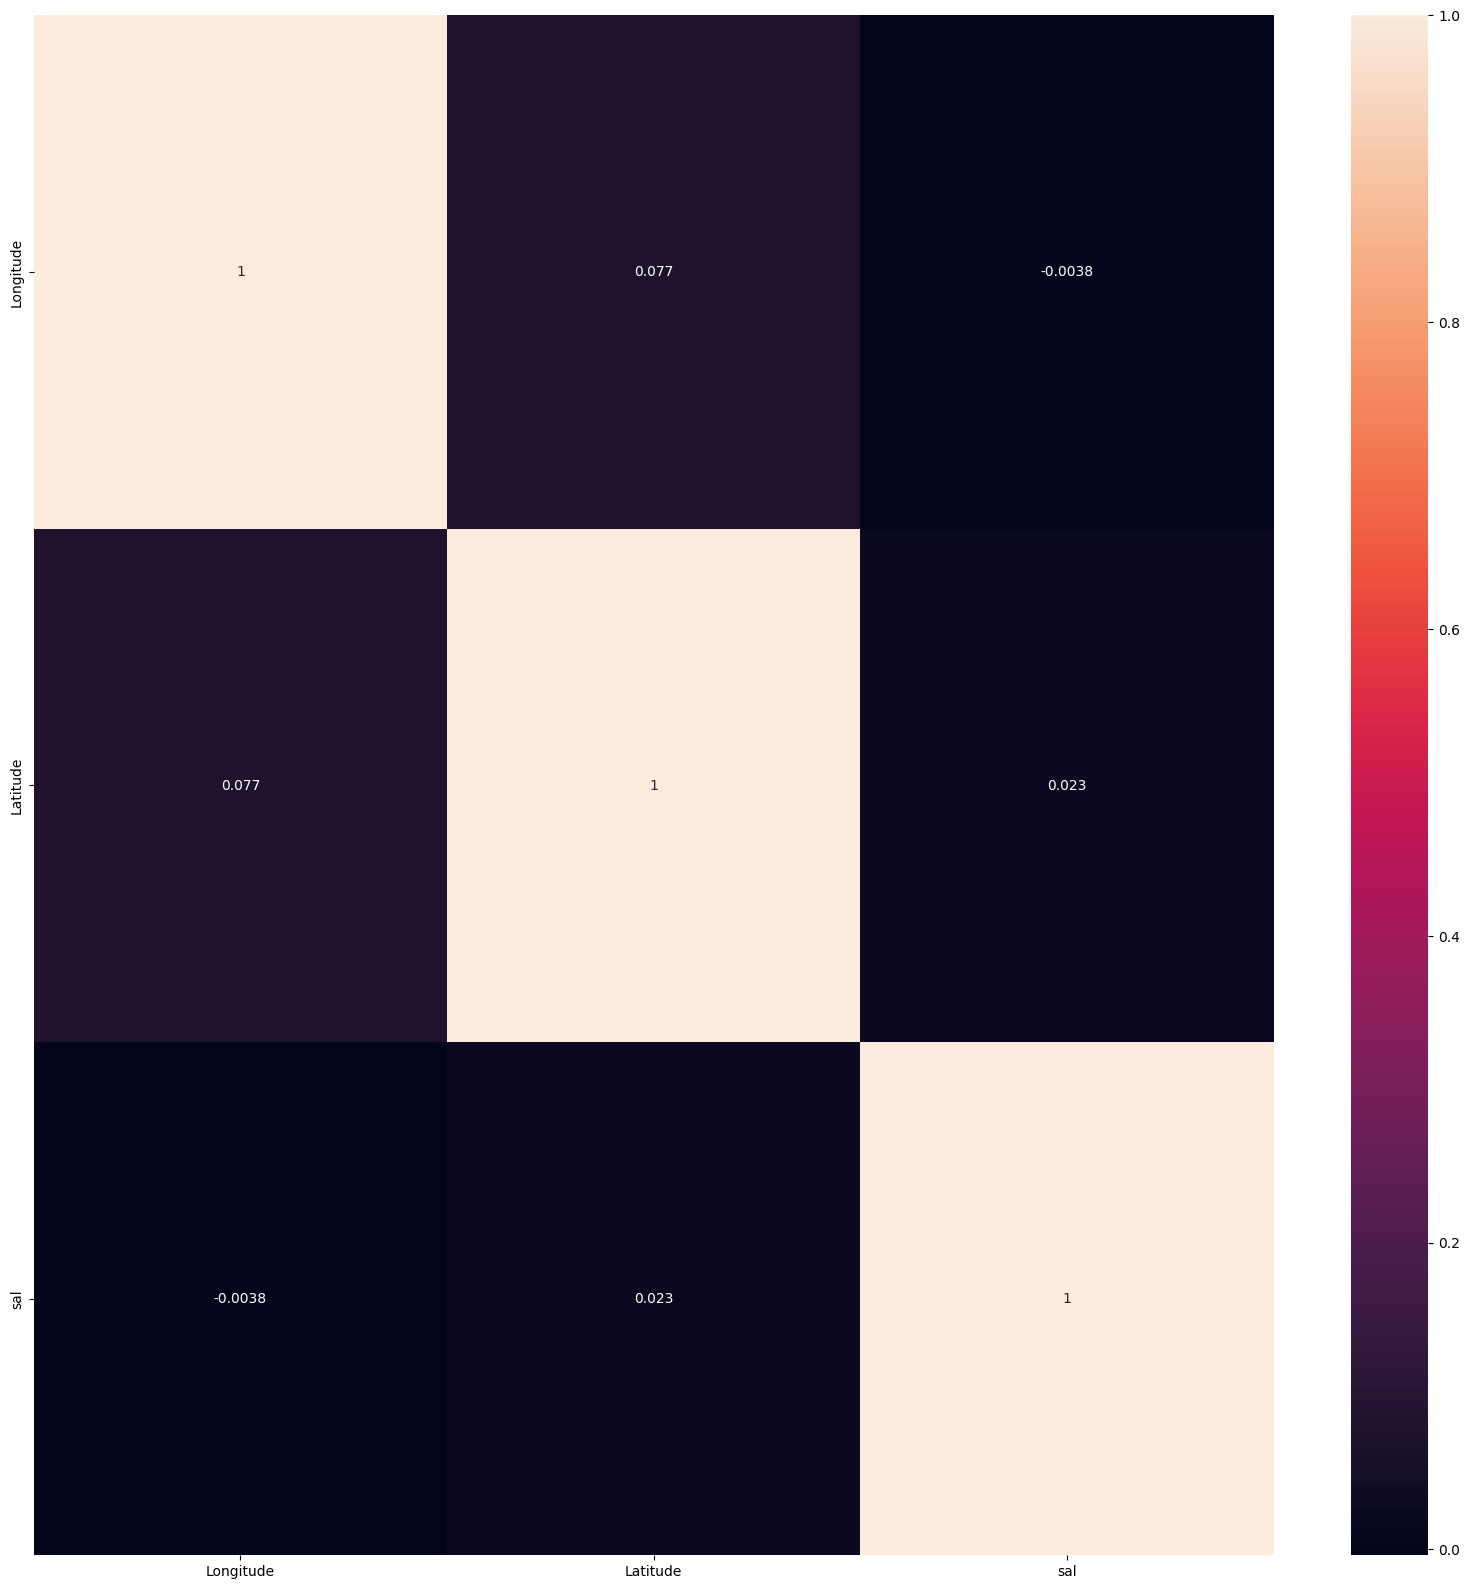

In [24]:
sns.heatmap(job.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

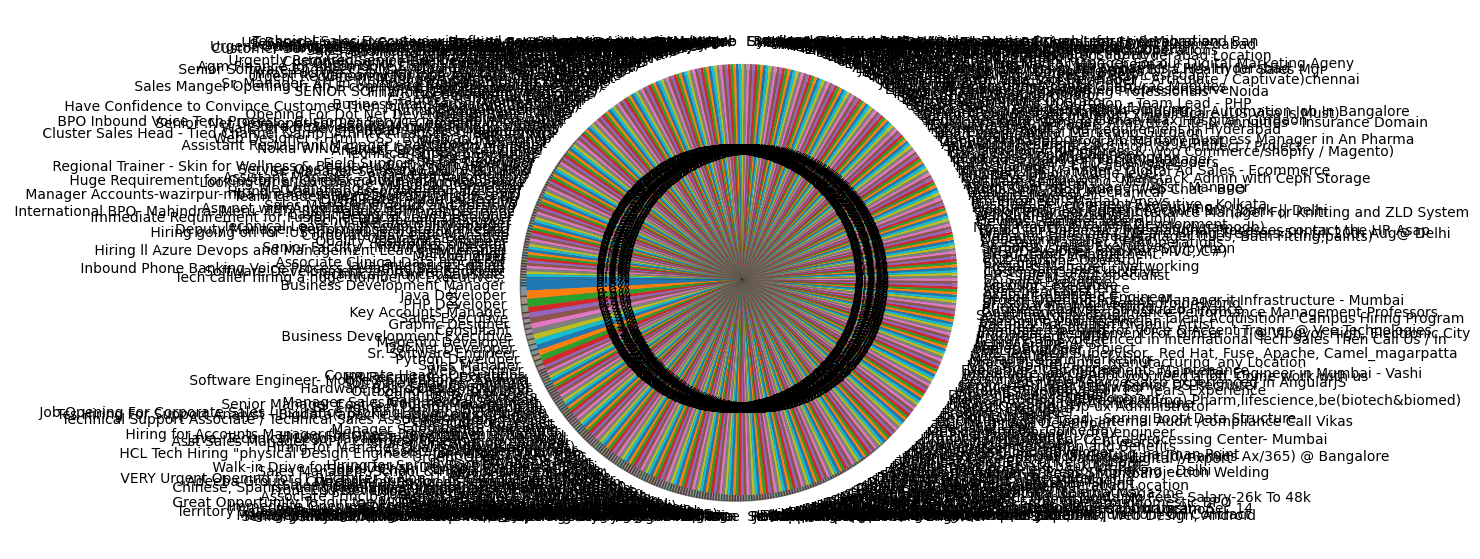

In [30]:
job['Job Title'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',startangle=180,shadow=True)
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

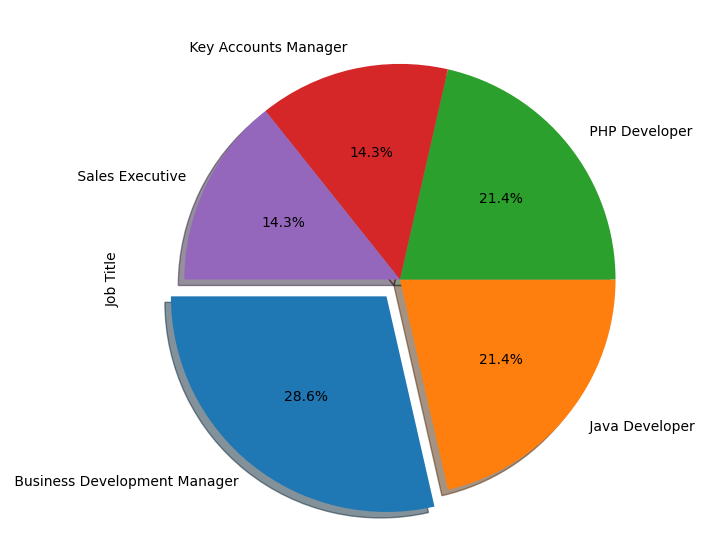

In [37]:
job['Job Title'].value_counts()[:5].plot(kind = 'pie',autopct='%1.1f%%',startangle=180,shadow=True ,explode = [0.1,0,0,0,0])
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

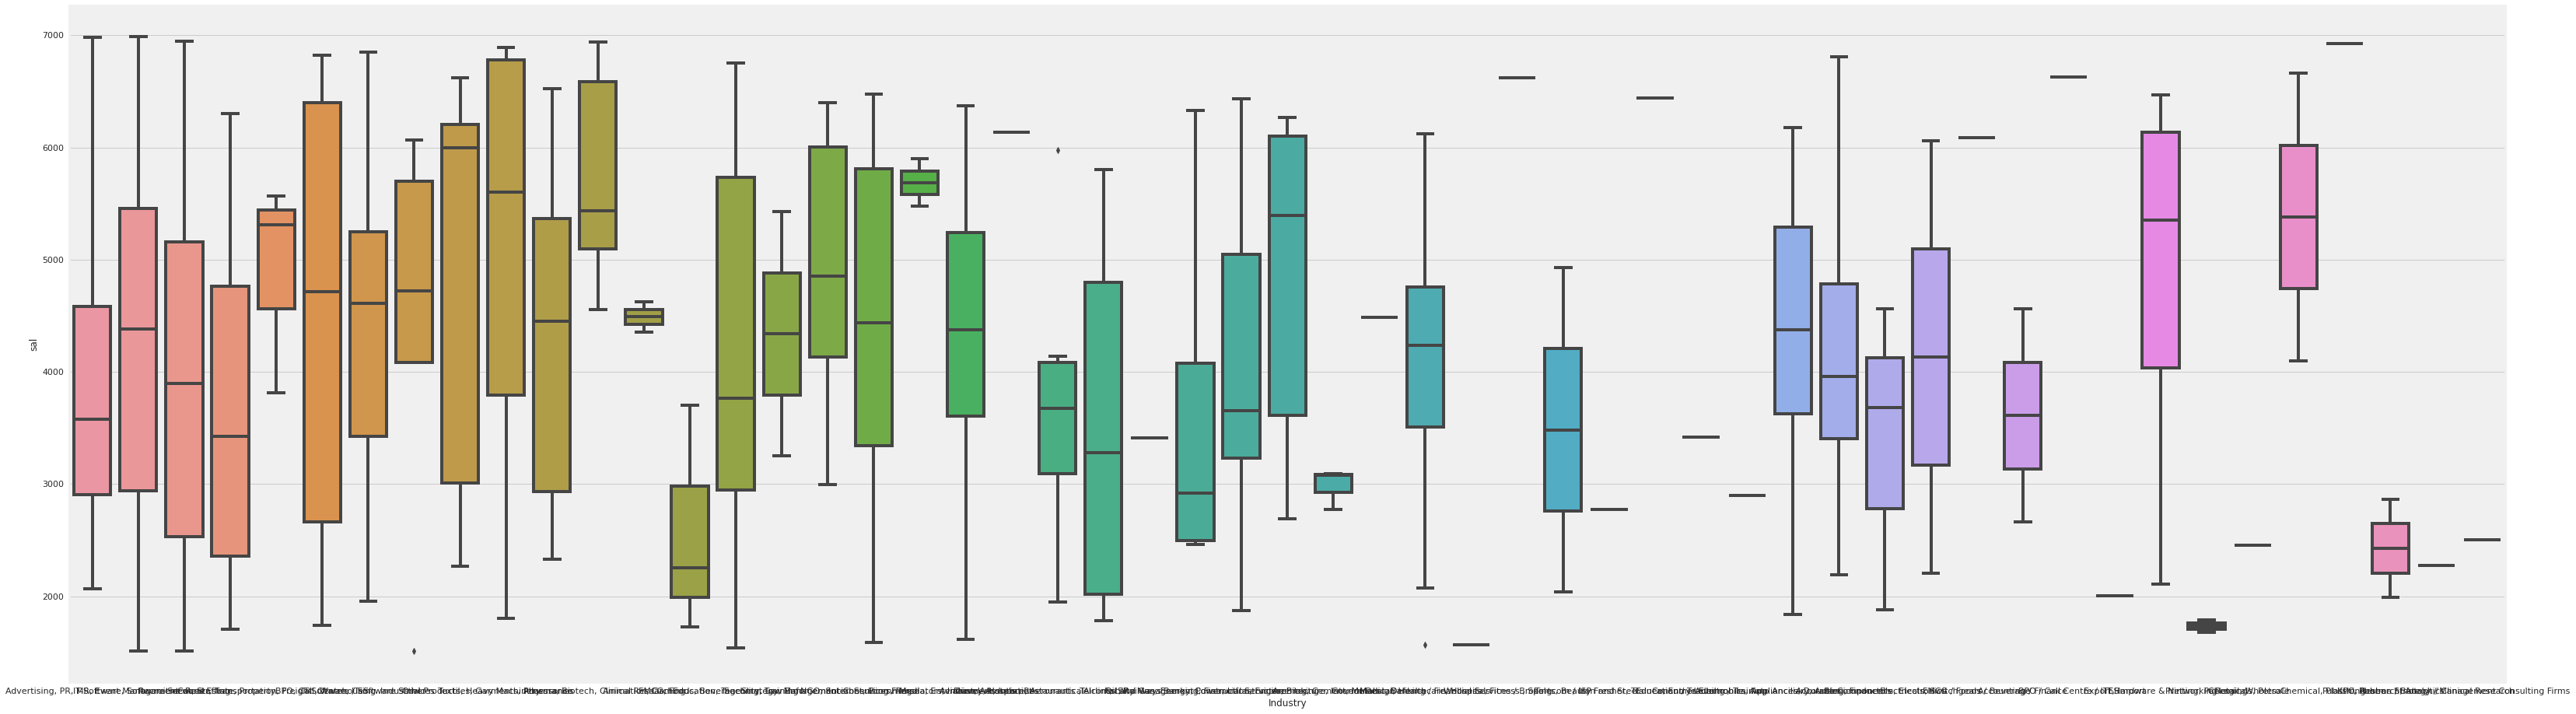

In [27]:
f,ax=plt.subplots(figsize=(50,16))
job = pd.concat([job['sal'], job['Industry']], axis=1)
fig = sns.boxplot(x='Industry', y="sal", data=job)

In [39]:
# Assuming 'job' is your DataFrame
average_salary = job.groupby('Industry')['sal'].mean().reset_index()

# Sort by average salary in descending order
sorted_average_salary = average_salary.sort_values(by='sal', ascending=False)

# Convert to list if needed
sorted_list = sorted_average_salary.values.tolist()

print(sorted_average_salary)  # This will display the sorted DataFrame
#print(sorted_list)            # This will display the sorted list of average salaries

                                             Industry          sal
40                                         Publishing  6923.000000
7                            BPO / Call Centre / ITES  6631.000000
52                Wellness , Fitness , Sports, Beauty  6619.000000
22                      Fresher, Trainee, Entry Level  6440.000000
6                   Aviation, Aerospace, Aeronautical  6136.000000
19                            FMCG / Foods / Beverage  6087.000000
38                 Pharma, Biotech, Clinical Research  5755.142857
34  NGO, Social Services, Regulators, Industry Ass...  5686.000000
11          Chemicals, PetroChemical, Plastic, Rubber  5379.500000
50                    Textiles, Garments, Accessories  4973.250000
47              Strategy, Management Consulting Firms  4922.000000
14     Courier, Transportation, Freight , Warehousing  4898.666667
12          Construction, Engineering, Cement, Metals  4833.875000
24                           IT-Hardware & Networking  4820.00

In [67]:
job = pd.read_csv("../data/jobss.csv")

In [68]:
job.drop("Unnamed: 1", axis = 1, inplace=True)

In [69]:
feas = ["Job Title", "Job Experience Required", "Key Skills", "Role Category", "Location", "Functional Area","Industry","Role"]

for col in tqdm(feas):
    map_dict = dict(zip(job[col].unique(), range(job[col].nunique())))
    
    job[col] = job[col].map(map_dict)
   
    job[f'{col}_count'] = job[col].map(job[col].value_counts())
    job.head()

  0%|          | 0/8 [00:00<?, ?it/s]

In [70]:
job.head()

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal,Job Title_count,Job Experience Required_count,Key Skills_count,Role Category_count,Location_count,Functional Area_count,Industry_count,Role_count
0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,72.877393,19.075990,3855,1.0,26,1,3.0,58.0,13.0,10.0,1.0
1,1.0,1,1,1.0,1.0,1.0,1.0,1.0,73.854454,18.521428,2639,1.0,32,1,35.0,1.0,74.0,187.0,16.0
2,2.0,2,2,2.0,2.0,2.0,2.0,2.0,77.002700,28.428262,2156,1.0,16,1,3.0,38.0,10.0,42.0,1.0
3,3.0,3,3,3.0,0.0,3.0,1.0,3.0,72.877393,19.075990,4059,1.0,7,1,15.0,58.0,119.0,187.0,6.0
4,4.0,1,4,4.0,3.0,4.0,1.0,4.0,78.474061,17.360589,5347,1.0,32,1,130.0,37.0,7.0,187.0,7.0


In [73]:
# Means that if a NaN value is encountered, it will be replaced with the last valid (non-NaN) value that was encountered before it in the same column.
job = job.fillna(method= "ffill")

<div style="color:white;display:fill;border-radius:8px;
            background-color:#FFE5B4;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'> 5 | Modelling</span></b></b></p>
</div>

In [74]:
y = job["sal"]
X = job.drop(columns='sal')  # Corrected line
X_train, X_val, y_train, y_val = train_test_split(job, y, test_size = 0.2, random_state=42)

In [75]:
def evaluateRegressor(true,predicted,message = "Test set"):
    MSE = mean_squared_error(true,predicted,squared = True)
    MAE = mean_absolute_error(true,predicted)
    RMSE = mean_squared_error(true,predicted,squared = False)
    LogRMSE = mean_squared_error(np.log(true),np.log(predicted),squared = False)
    print(message)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print("LogRMSE:", LogRMSE)

In [86]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

In [87]:
evaluateRegressor(y_val, pred, "Train Set:")

Train Set:
MSE: 13492.36
MAE: 105.86
RMSE: 116.15661840807867
LogRMSE: 0.03555005357984744


<div style="color:white;display:fill;border-radius:8px;
            background-color:#FFE5B4;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'> 6 | Plot Repreentation of Feature Importance</span></b></b></p>
</div>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

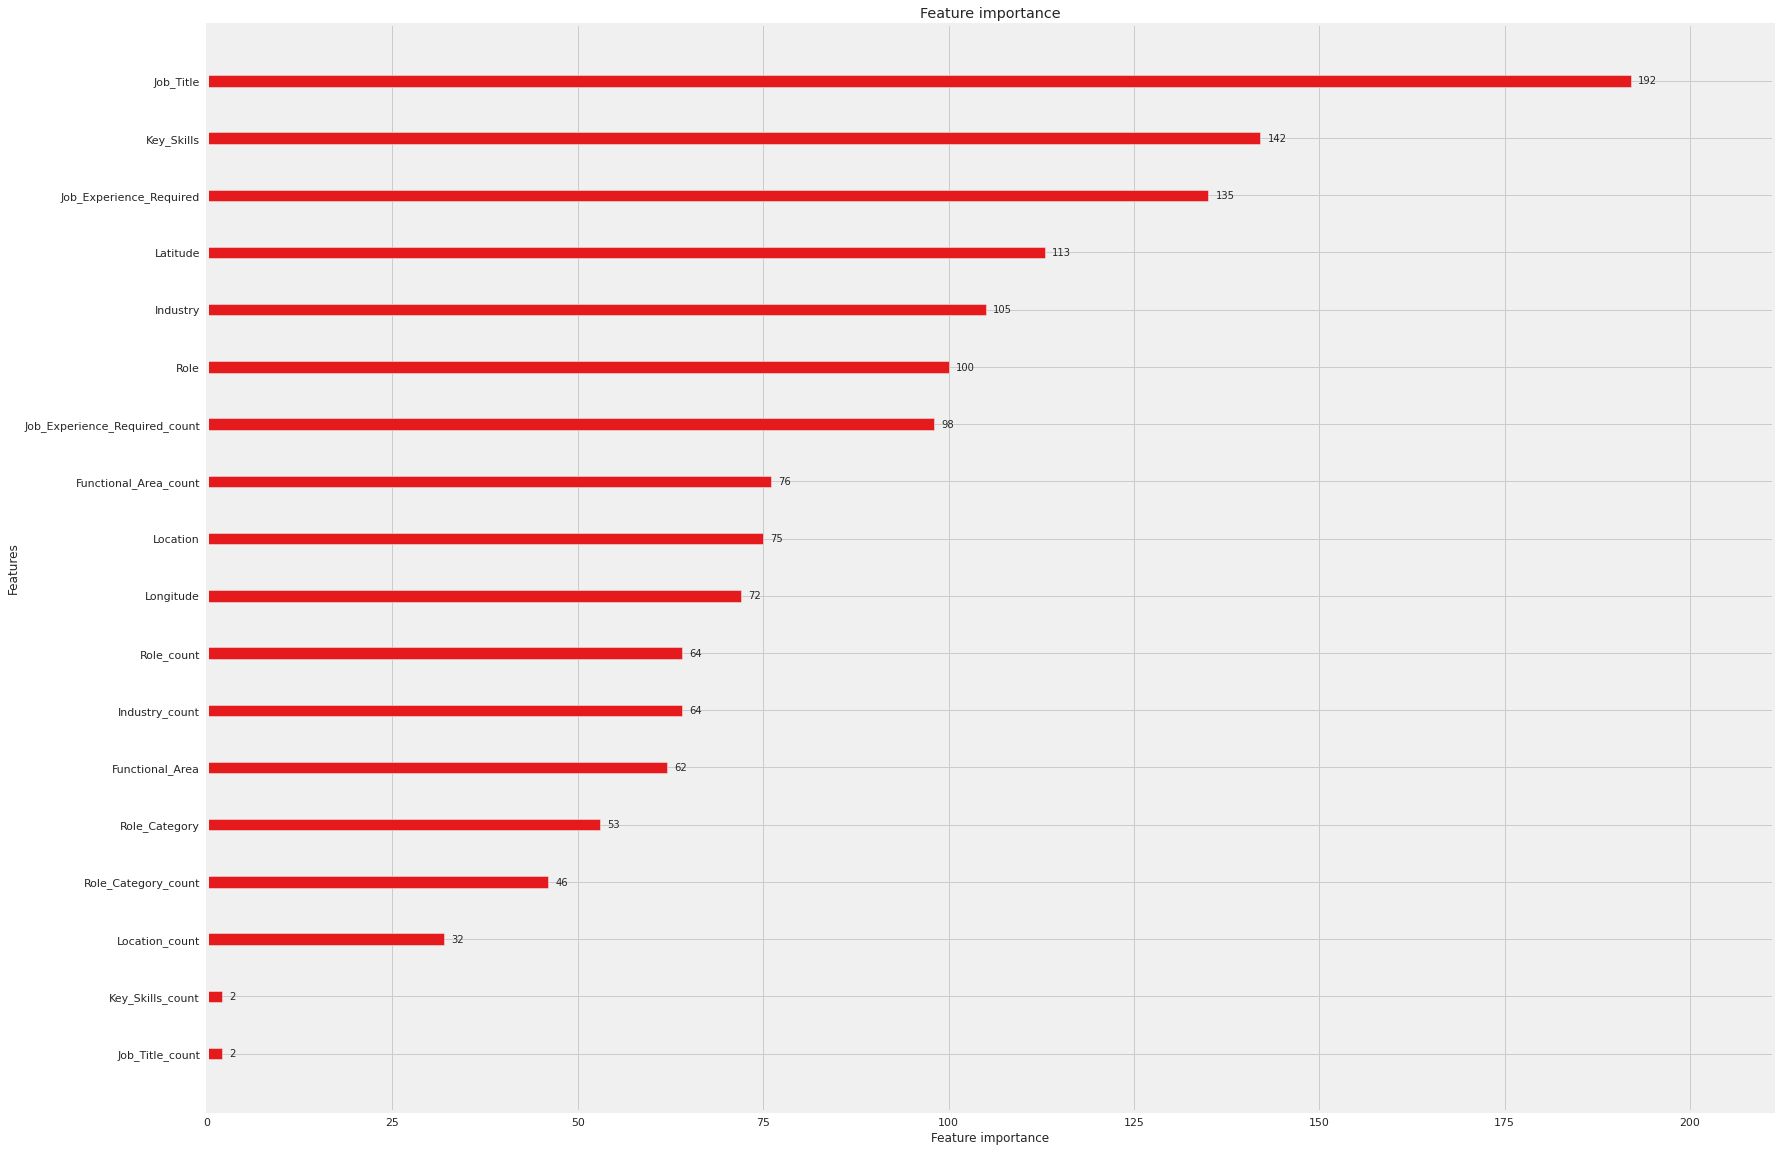

In [38]:
lgb.plot_importance(LGBMReg,figsize=(25,20))